<a href="https://colab.research.google.com/github/abdyraman/annualsatisfactionsurvey/blob/main/annualsatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting GS Data



In [1]:
#Authentification to google collab
from google.colab import auth
auth.authenticate_user()
#Other libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gspread
from google.auth import default
creds,_=default()

gs=gspread.authorize(creds)
#Get google sheet
# Open the Google Sheet by name (do not include the .gsheet extension)
sheet = gs.open("Annual job satisfaction (Responses)") # Correct name without .gsheet

# Access the specific worksheets
df_text = pd.DataFrame(sheet.worksheet("Form Responses 1").get_all_records())
df_numbers = pd.DataFrame(sheet.worksheet("numeric").get_all_records())


# Text data

In [3]:
#Checked for NaN values
df_text.isnull().sum()

,0
Timestamp,0
How happy are you with your work environment?,0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],0
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],0
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",0


In [4]:
df_text.dtypes

,0
Timestamp,object
How happy are you with your work environment?,object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",object
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],object
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",object
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],object
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],object
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",object


In [5]:
#Checking the unique answer points per feature
unique_counts_objects = df_text.select_dtypes('object').nunique()
unique_counts_objects

,0
Timestamp,100
How happy are you with your work environment?,12
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",5
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",5
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],5
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],5
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",5
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],5
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],5
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",5


In [6]:
# Looping through each categorical variable and printing its unique values and counts
for i in unique_counts_objects.index:
    unique_values = df_text[i].value_counts()
    print(f'Unique values of {i}:')
    print(unique_values)
    print()

Unique values of Timestamp:
Timestamp
9/21/2024 16:18:48     1
11/23/2024 16:18:48    1
12/3/2024 16:18:48     1
12/2/2024 16:18:48     1
12/1/2024 16:18:48     1
                      ..
10/21/2024 16:18:48    1
10/20/2024 16:18:48    1
10/19/2024 16:18:48    1
10/18/2024 16:18:48    1
12/29/2024 16:18:48    1
Name: count, Length: 100, dtype: int64

Unique values of How happy are you with your work environment?:
How happy are you with your work environment?
                                                                                                                                                                                                                                                                                                                         89
I'm really content with my work environment! It's stimulating and collaborative, with opportunities to learn and grow. I appreciate how my efforts are valued, and I feel supported in the tasks I take on. Of course, there 

In [ ]:
df_text.columns

Index(['Timestamp', 'How happy are you with your work environment?',
       'Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]',
       'Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]',
       'Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged]',
       'Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues]',
       'Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to supp

Values & Norms

In [7]:
#Choosing variables that reflects the values and norms in the organisation
values_norms=df_text[["Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]"]]

# Remove the specific text from the column names
values_norms.columns = values_norms.columns.str.replace(
    r"Please rate the following statements on a scale from 'Never' to 'All of the time' \[|\]",
    "",
    regex=True
).str.strip()  # Remove leading and trailing whitespace

# Melt the DataFrame to long format
melted_values = values_norms.melt(var_name='Statement', value_name='Rating')

# Count occurrences of each rating per statement
rating_counts_values_norms = melted_values.groupby(['Statement','Rating']).size().reset_index(name='Count')


<ipython-input-8-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


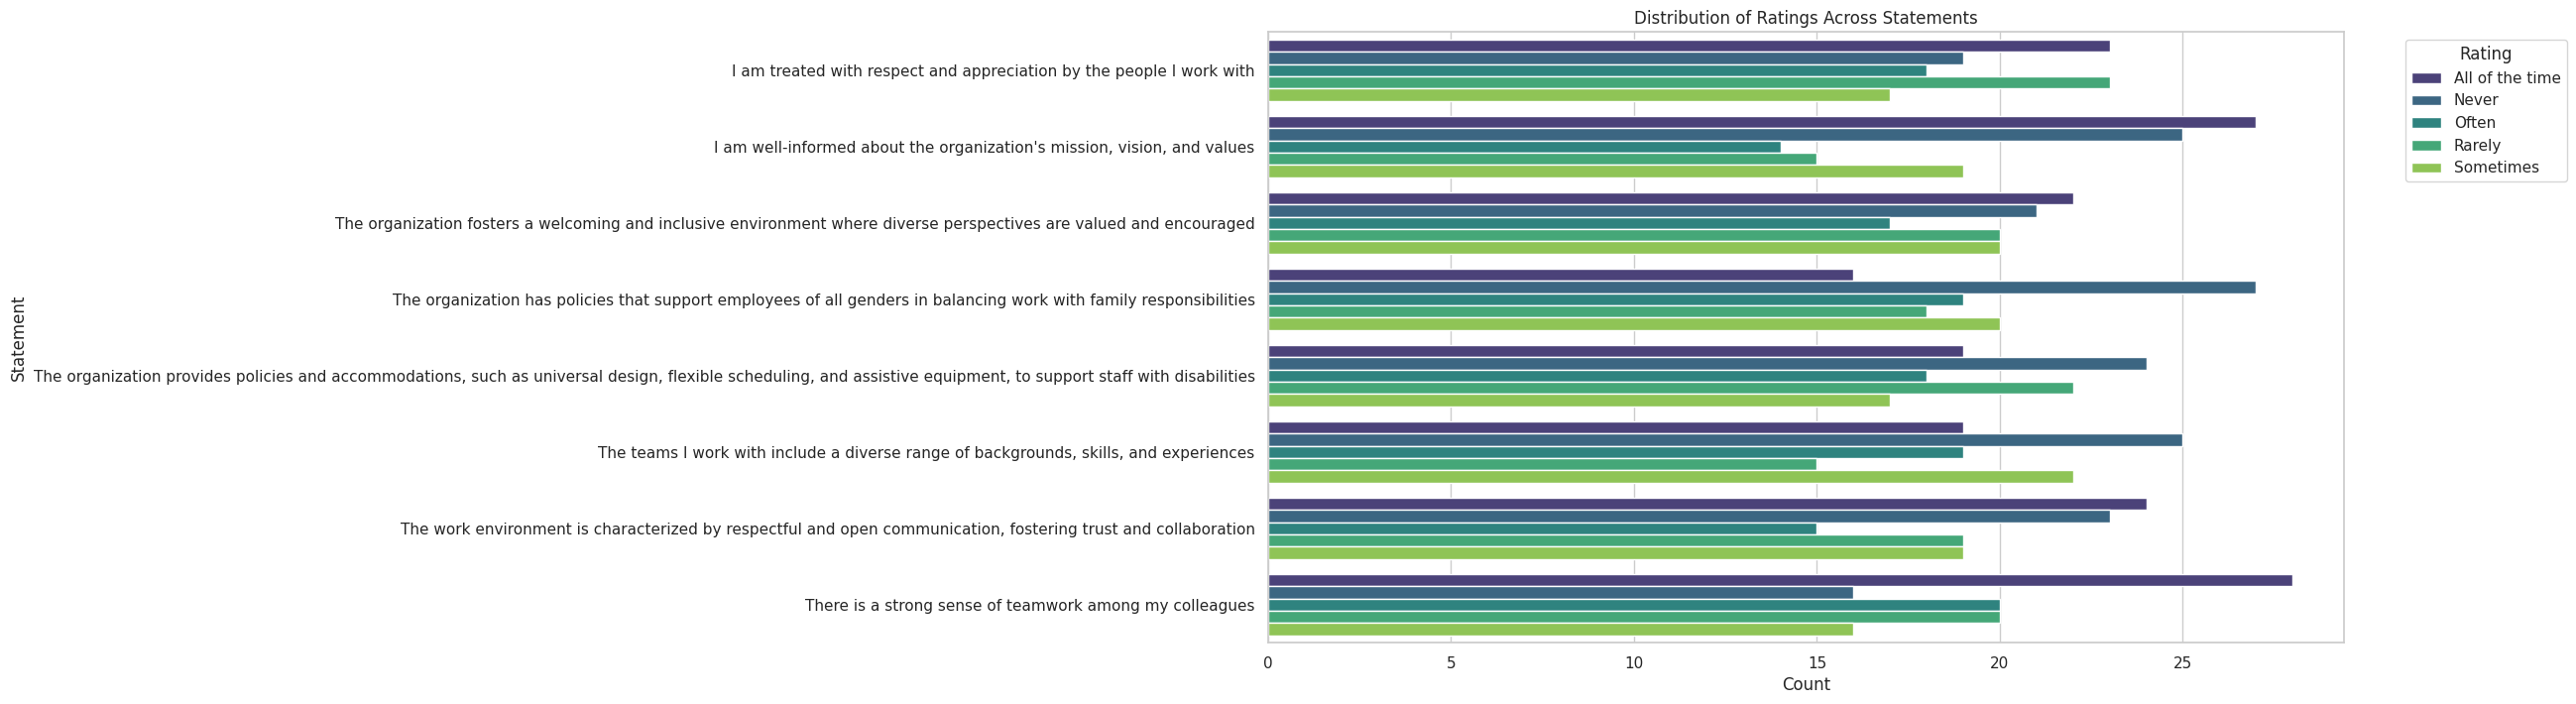

In [8]:
# Create a horizontal bar plot
def plotting (data):
  plt.figure(figsize=(14, 8))
  sns.set_theme(style="whitegrid")

  # Create a horizontal bar plot for each rating
  sns.barplot(x='Count', y='Statement', hue='Rating', data=data, palette='viridis', dodge=True)

  # Title and labels
  plt.title('Distribution of Ratings Across Statements')
  plt.xlabel('Count')
  plt.ylabel('Statement')
  plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

plotting(rating_counts_values_norms)

In [9]:
# Create a new worksheet
new_sheet_title = "Values_Norms"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="150", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_norms.columns.values.tolist()] + rating_counts_values_norms.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Values_Norms!A1:C41',
 'updatedRows': 41,
 'updatedColumns': 3,
 'updatedCells': 123}

Finances

In [10]:
values_finances=df_text[["Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I am compensated fairly for my role and responsibilities]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The criteria used to determine compensation are clearly defined]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The benefits provided by the organization meet my needs fully]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [Job compensation rates are transparent and clearly communicated]"]]

def processing_data(values):
    # Remove the specific text from the column names
    values.columns = values.columns.str.replace(
        r"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' \[|\]",
        "",
        regex=True
    ).str.strip()  # Remove leading and trailing whitespace

    # Melt the DataFrame to long format
    melted_values = values.melt(var_name='Statement', value_name='Rating')

    # Count occurrences of each rating per statement
    rating_counts_values = melted_values.groupby(['Statement', 'Rating']).size().reset_index(name='Count')

    return rating_counts_values

# Process the DataFrame
rating_counts_values_finances = processing_data(values_finances)

# Display the result
rating_counts_values_finances


,Statement,Rating,Count
0,I am compensated fairly for my role and respon...,Agree,19
1,I am compensated fairly for my role and respon...,Disagree,21
2,I am compensated fairly for my role and respon...,Neutral,24
3,I am compensated fairly for my role and respon...,Strongly Agree,17
4,I am compensated fairly for my role and respon...,Strongly Disagree,19
5,Job compensation rates are transparent and cle...,Agree,27
6,Job compensation rates are transparent and cle...,Disagree,24
7,Job compensation rates are transparent and cle...,Neutral,18
8,Job compensation rates are transparent and cle...,Strongly Agree,17
9,Job compensation rates are transparent and cle...,Strongly Disagree,14


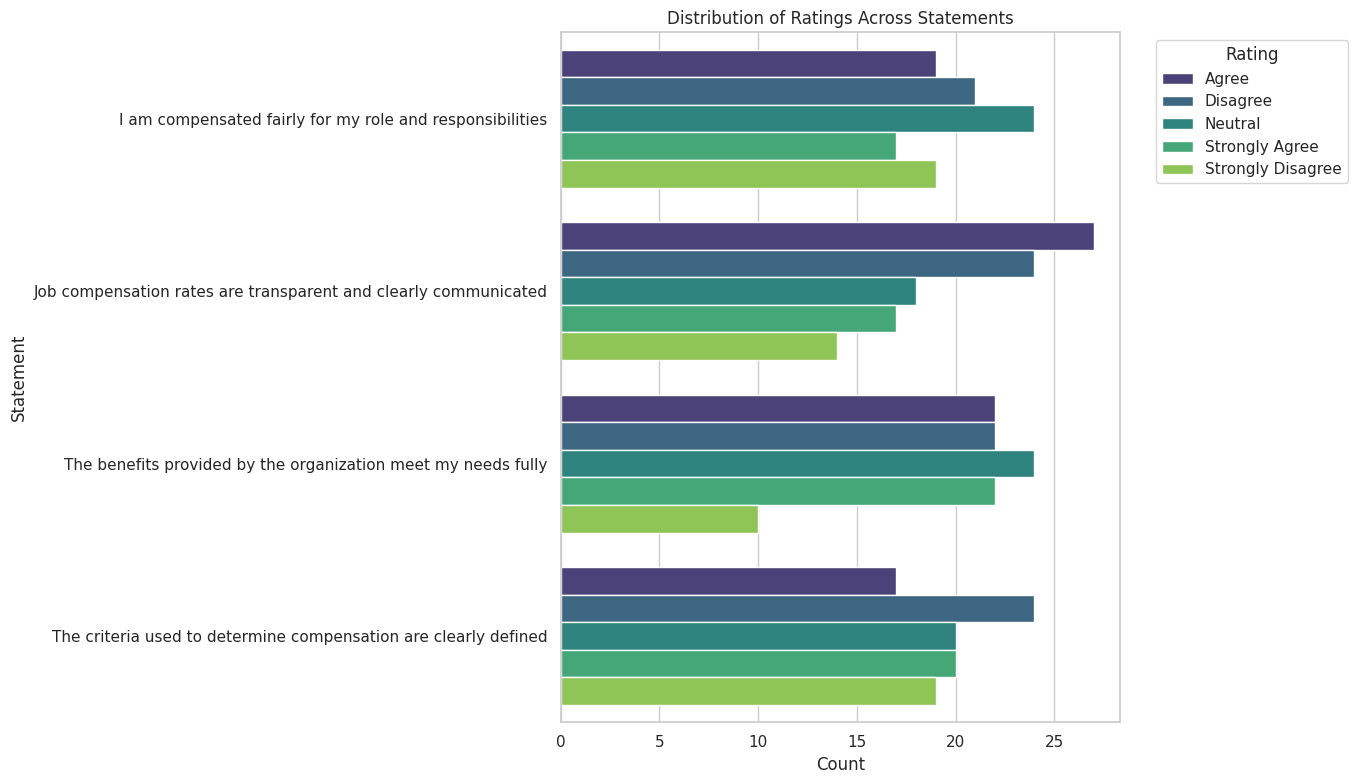

In [11]:
# Create a horizontal bar plot
plotting(rating_counts_values_finances)

In [12]:
 # Create a new worksheet
new_sheet_title = "Finances"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="150", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_finances.columns.values.tolist()] + rating_counts_values_finances.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Finances!A1:C21',
 'updatedRows': 21,
 'updatedColumns': 3,
 'updatedCells': 63}

Recongnition

In [13]:
values_recognition=df_text[["Please rate the following statements on a scale from 'Never' to 'All of the time' [I am satisfied with my current role and responsibilities]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [I have opportunities to contribute to the organization's goals and objectives]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [I feel recognized and appreciated for my contributions]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [Recognition and appreciation for my work are given in a timely and meaningful manner.]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides adequate flexibility in work schedules to meet employees' personal and family needs]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work schedule is flexible enough to accommodate my personal circumstances, such as pregnancy, disability, or caregiving responsibilities etc]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [I feel a strong sense of motivation and commitment to excel in my current role]"
       ,"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am motivated to go above and beyond in my current role]"]]

def processing_data(values):
    # Remove the specific text from the column names
    values.columns = values.columns.str.replace(
        r"Please rate the following statements on a scale from 'Never' to 'All of the time' \[|\]",
        "",
        regex=True
    ).str.strip()  # Remove leading and trailing whitespace

    # Melt the DataFrame to long format
    melted_values = values.melt(var_name='Statement', value_name='Rating')

    # Count occurrences of each rating per statement
    rating_counts_values = melted_values.groupby(['Statement', 'Rating']).size().reset_index(name='Count')

    return rating_counts_values

# Process the DataFrame
rating_counts_values_recognition = processing_data(values_recognition)

# Display the result
rating_counts_values_recognition


,Statement,Rating,Count
0,I am motivated to go above and beyond in my cu...,All of the time,14
1,I am motivated to go above and beyond in my cu...,Never,22
2,I am motivated to go above and beyond in my cu...,Often,26
3,I am motivated to go above and beyond in my cu...,Rarely,23
4,I am motivated to go above and beyond in my cu...,Sometimes,15
5,I am satisfied with my current role and respon...,All of the time,23
6,I am satisfied with my current role and respon...,Never,22
7,I am satisfied with my current role and respon...,Often,19
8,I am satisfied with my current role and respon...,Rarely,27
9,I am satisfied with my current role and respon...,Sometimes,9


<ipython-input-8-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


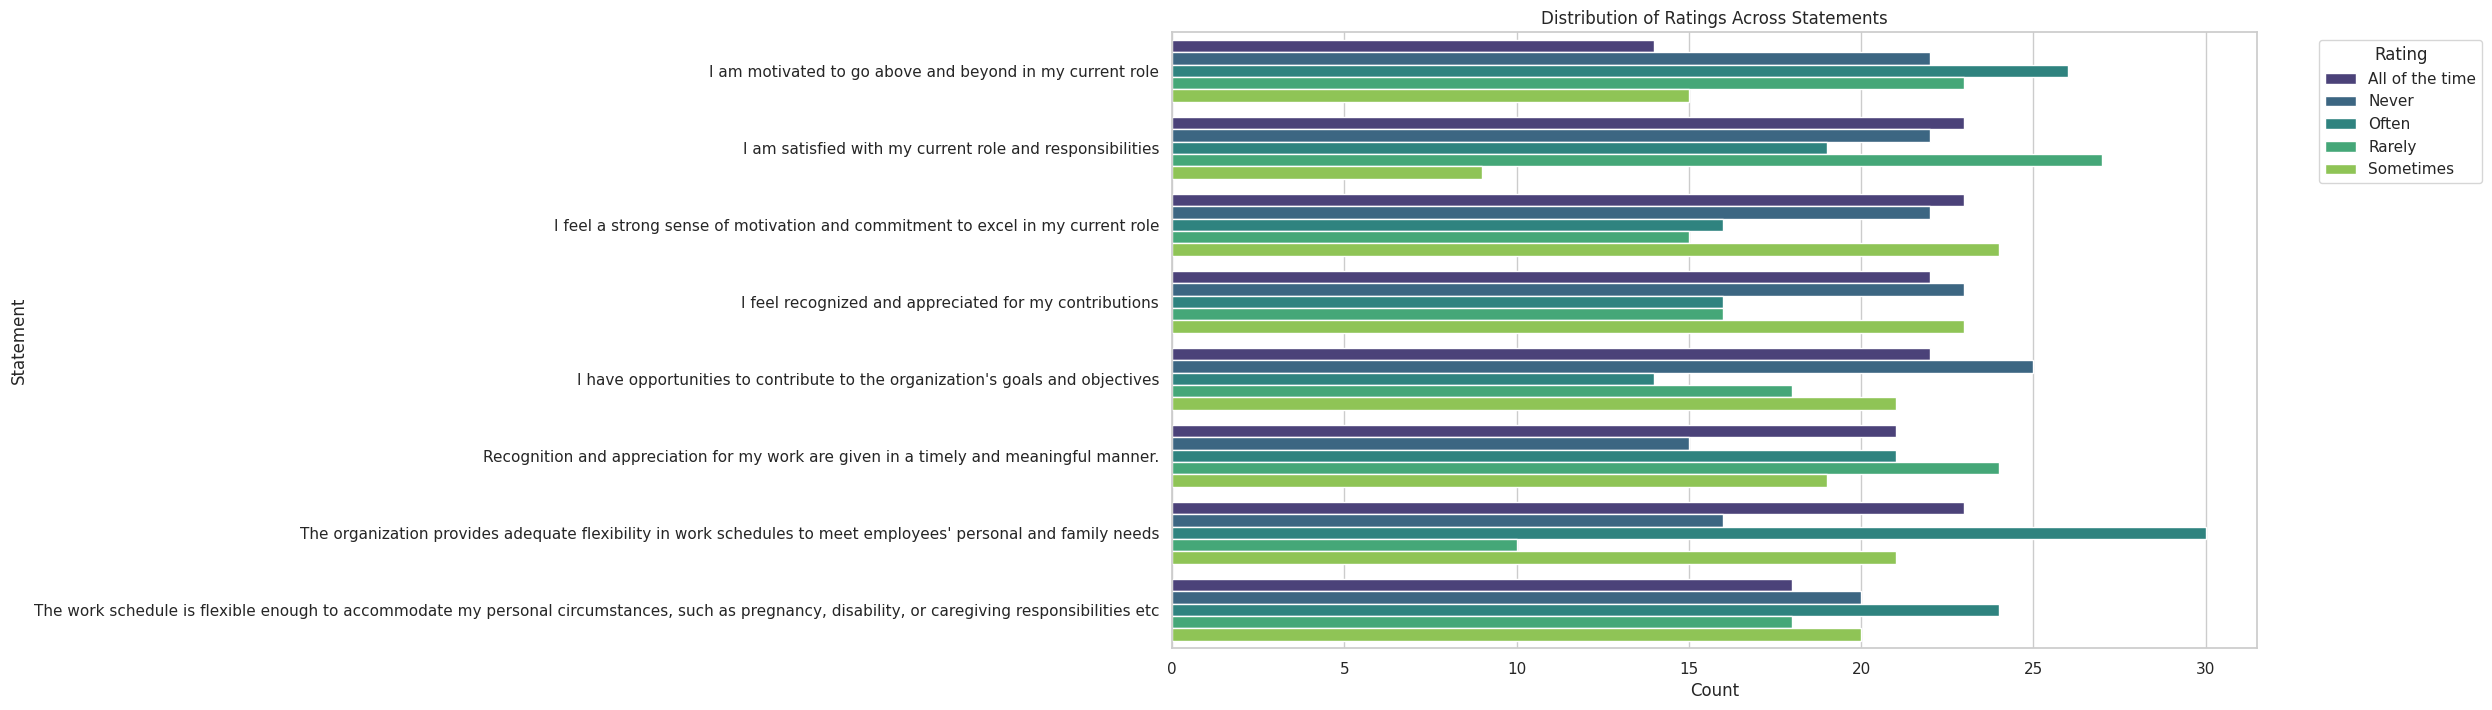

In [14]:
plotting(rating_counts_values_recognition)

In [15]:
 # Create a new worksheet
new_sheet_title = "Recognition"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_recognition.columns.values.tolist()] + rating_counts_values_recognition.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Recognition!A1:C41',
 'updatedRows': 41,
 'updatedColumns': 3,
 'updatedCells': 123}

Job satisfaction and engagement

In [16]:
values_satis_engage= df_text[["Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The organization invests in my professional development by offering financial support and dedicated time for learning]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I receive sufficient learning opportunities in my job]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The feedback and performance review process is effective in helping me improve and develop]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The feedback I receive is clear and actionable]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [My immediate supervisor actively supports my professional growth by providing constructive feedback on areas for development]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I am open to taking on more responsibilities]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [There are clear career growth opportunities in the organization]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I see myself growing and developing my career at this organization]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I know what steps I need to take in order to move up in the organization in the next year]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The organization has a strategic workforce plan that identifies upcoming hiring needs with specific skills and experience required for each role]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [Work incentives reflect the diverse needs and interests of all team members]"]]

def processing_data(values):
    # Remove the specific text from the column names
    values.columns = values.columns.str.replace(
        r"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' \[|\]",
        "",
        regex=True
    ).str.strip()  # Remove leading and trailing whitespace

    # Melt the DataFrame to long format
    melted_values = values.melt(var_name='Statement', value_name='Rating')

    # Count occurrences of each rating per statement
    rating_counts_values = melted_values.groupby(['Statement', 'Rating']).size().reset_index(name='Count')

    return rating_counts_values

# Process the DataFrame
rating_counts_values_satis_engage = processing_data(values_satis_engage)

# Display the result
rating_counts_values_satis_engage

,Statement,Rating,Count
0,I am open to taking on more responsibilities,Agree,23
1,I am open to taking on more responsibilities,Disagree,27
2,I am open to taking on more responsibilities,Neutral,18
3,I am open to taking on more responsibilities,Strongly Agree,17
4,I am open to taking on more responsibilities,Strongly Disagree,15
5,I know what steps I need to take in order to m...,Agree,26
6,I know what steps I need to take in order to m...,Disagree,12
7,I know what steps I need to take in order to m...,Neutral,16
8,I know what steps I need to take in order to m...,Strongly Agree,24
9,I know what steps I need to take in order to m...,Strongly Disagree,22


<ipython-input-8-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


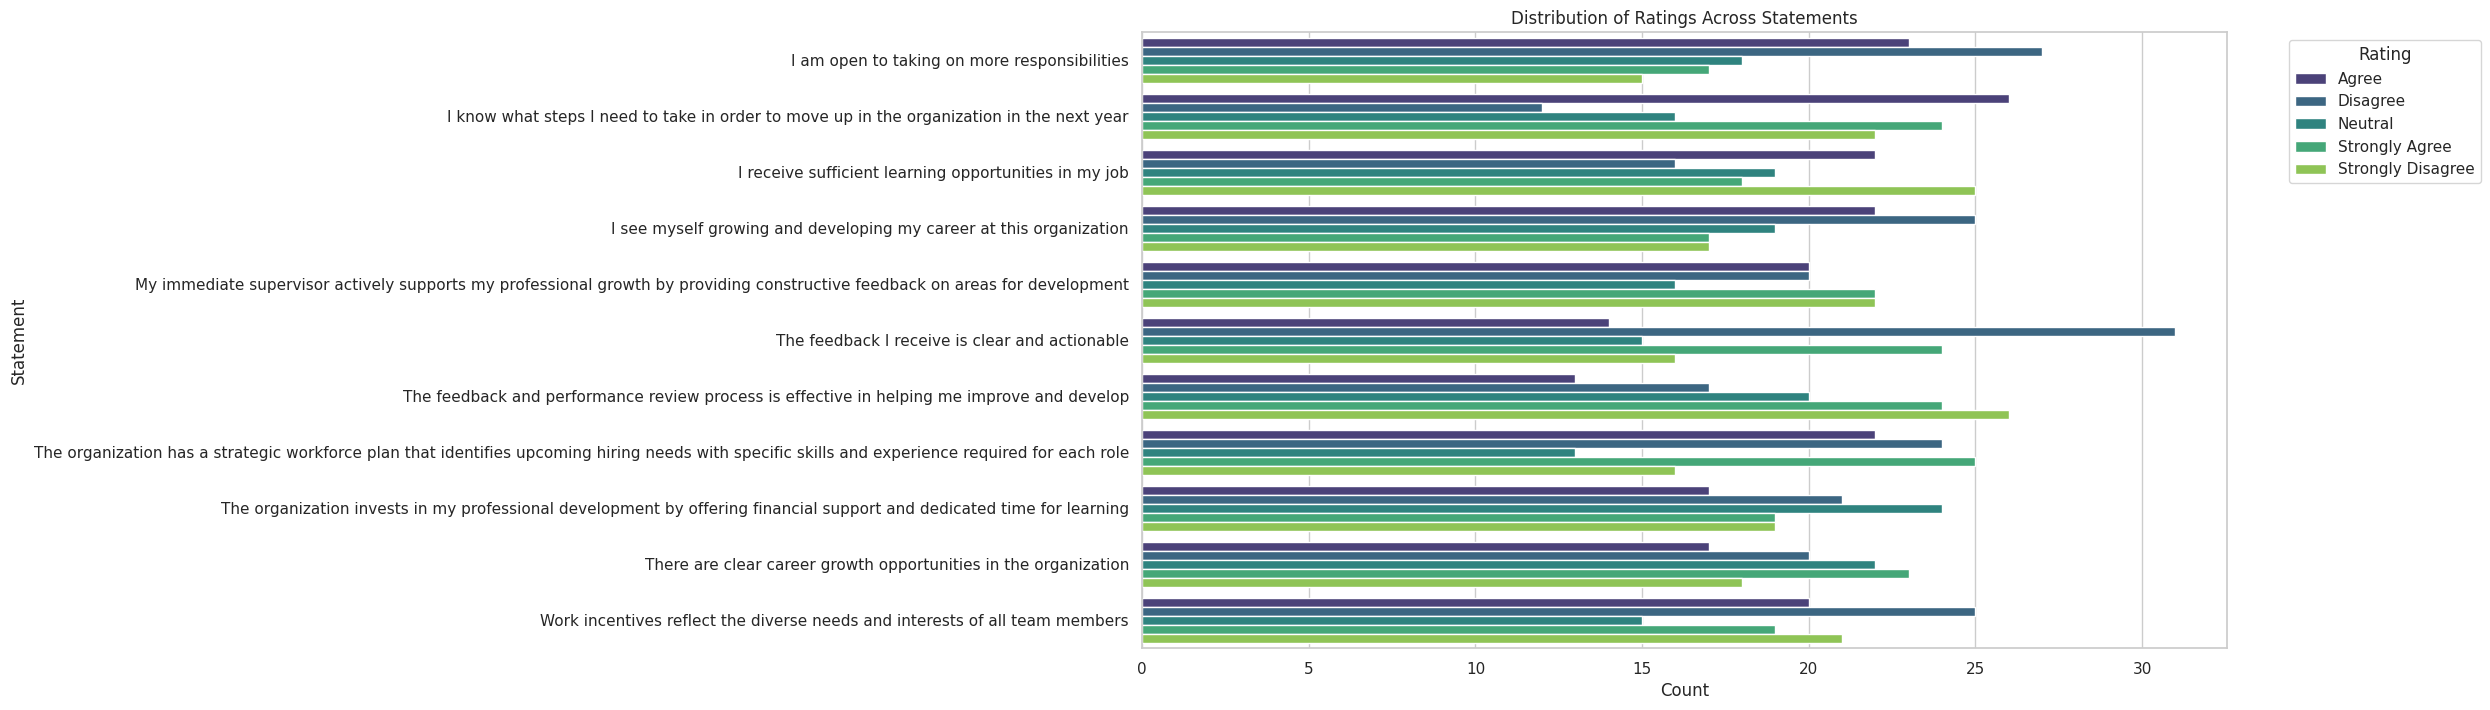

In [17]:
plotting(rating_counts_values_satis_engage)

In [18]:
 # Create a new worksheet
new_sheet_title = "Satisfaction_Engagement"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_satis_engage.columns.values.tolist()] + rating_counts_values_satis_engage.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Satisfaction_Engagement!A1:C56',
 'updatedRows': 56,
 'updatedColumns': 3,
 'updatedCells': 168}

Biases in the workplace

In [19]:
values_biases=df_text[["Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [My success is determined by my skills, dedication, and the value I bring to the team, not by my personal background]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The organization provides a fair and equitable environment where everyone has equal access to opportunities for professional growth]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [My supervisors and senior leaders actively encourage and welcome all perspectives]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [There are situations where ideas from underserved groups (women, BIPOC individuals, people with disabilities, and non-binary people) are overlooked, while similar ideas from others are more frequently recognized]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [Office tasks, such as note-taking and managing meeting invites, are assigned fairly and according to job descriptions or distributed equally among participants]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [There are informal and formal workplace social outings where all groups, regardless of their background, are welcomed to participate]"
       ,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I would be comfortable reporting inappropriate conduct by a colleague]"]]
# Process the DataFrame
rating_counts_values_biases = processing_data(values_biases)

# Display the result
rating_counts_values_biases

,Statement,Rating,Count
0,I would be comfortable reporting inappropriate...,Agree,24
1,I would be comfortable reporting inappropriate...,Disagree,21
2,I would be comfortable reporting inappropriate...,Neutral,17
3,I would be comfortable reporting inappropriate...,Strongly Agree,21
4,I would be comfortable reporting inappropriate...,Strongly Disagree,17
5,"My success is determined by my skills, dedicat...",Agree,19
6,"My success is determined by my skills, dedicat...",Disagree,19
7,"My success is determined by my skills, dedicat...",Neutral,20
8,"My success is determined by my skills, dedicat...",Strongly Agree,20
9,"My success is determined by my skills, dedicat...",Strongly Disagree,22


<ipython-input-8-314875c21e45>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


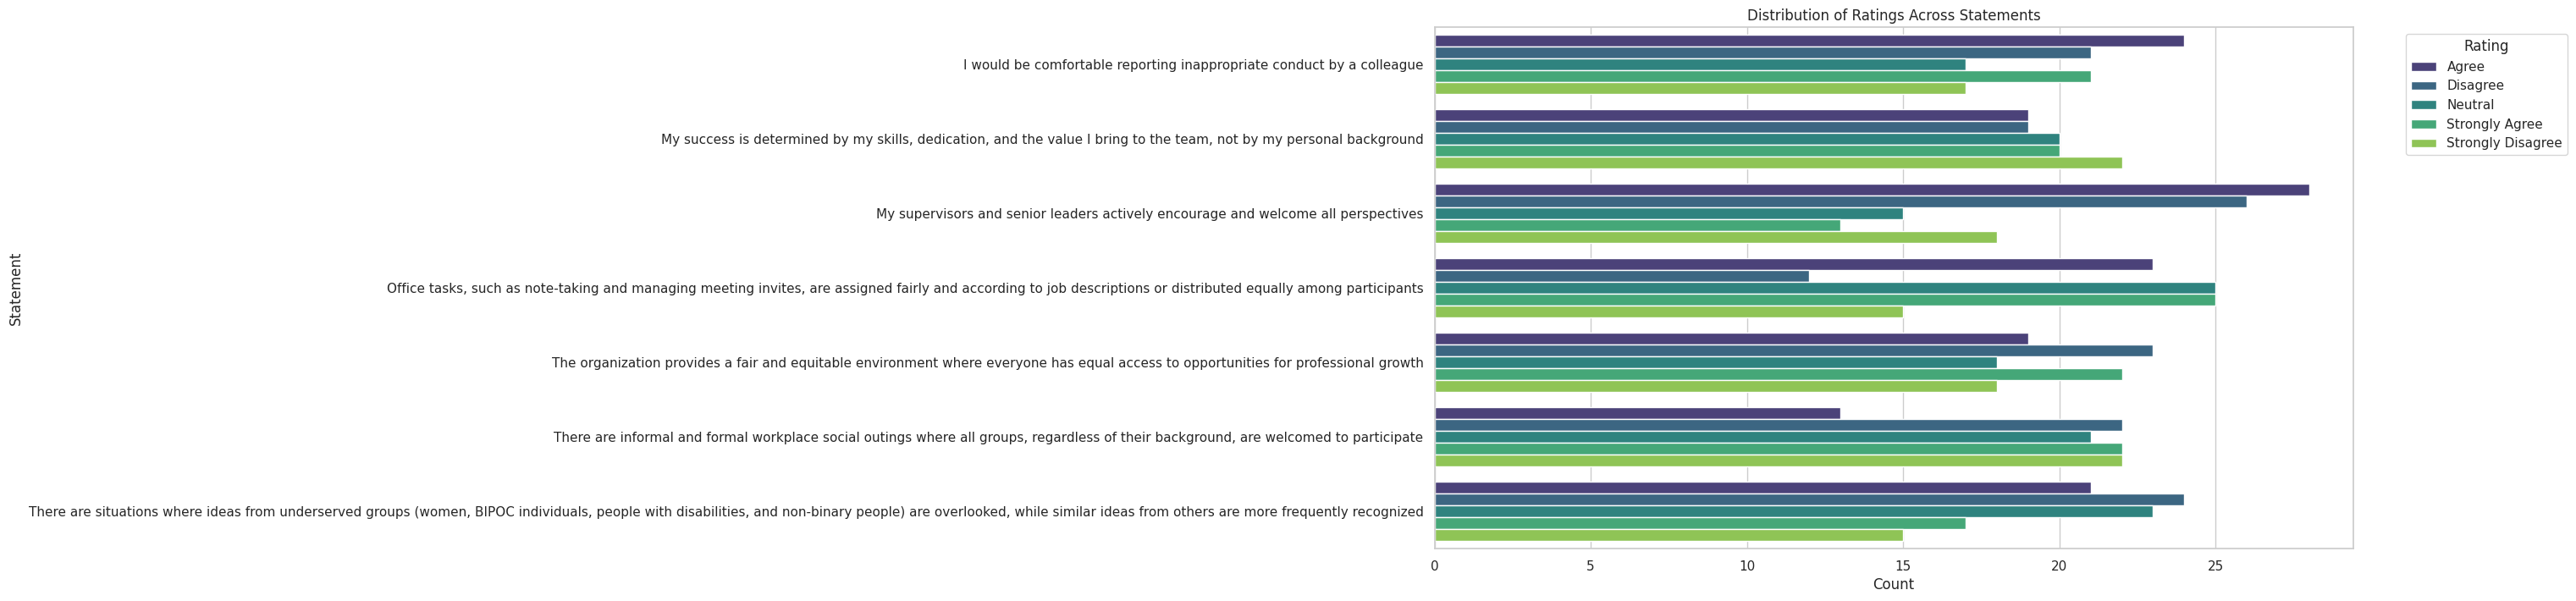

In [20]:
plotting(rating_counts_values_biases)

In [21]:
 # Create a new worksheet
new_sheet_title = "Biases"  # Desired sheet name
worksheet = sheet.add_worksheet(title=new_sheet_title, rows="100", cols="10")  # Adjust rows and cols as needed

# Update the new worksheet with DataFrame content
worksheet.update([rating_counts_values_biases.columns.values.tolist()] + rating_counts_values_biases.values.tolist())

{'spreadsheetId': '1hZSTWkDHN0HKazHx2RO_fULFdOb9Mxw24TGc4CkuOxM',
 'updatedRange': 'Biases!A1:C36',
 'updatedRows': 36,
 'updatedColumns': 3,
 'updatedCells': 108}

# **Numeric data**

In [23]:
df_numbers

,Timestamp,How happy are you with your work environment?,"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]","Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",...,"Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [There are informal and formal workplace social outings where all groups, regardless of their background, are welcomed to participate]",Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I would be comfortable reporting inappropriate conduct by a colleague],Please rate the following statements on a scale from 'Very Unlikely' to 'Very Likely' [How likely are you to recommend this company to others seeking employment?],Which of the following describes your gender?,Do you identify as a person with a disability?,Do you identify as Indigenous?,Do you identify as visible minority?,Are you a member of the 2SLGBTQI+ communities?,What industry are you working in?,How long have you worked for the organization?
0,9/21/2024 16:18:48,I'm really content with my work environment! I...,4,5,1,5,2,4,3,3,...,4,5,2,Man,No,I prefer not to say,I prefer not to say,I prefer not to say,Retail,19
1,9/22/2024 16:18:48,,2,4,1,3,2,3,4,5,...,3,5,4,Non-binary,Yes,I prefer not to say,No,I prefer not to say,Education,29
2,9/23/2024 16:18:48,I’m very happy with my work environment. It’s ...,5,1,1,1,4,2,4,5,...,3,4,3,Man,I prefer not to say,No,Yes,I prefer not to say,Energy,9
3,9/24/2024 16:18:48,,1,2,3,3,4,2,3,2,...,1,4,1,Man,No,Yes,Yes,I prefer not to say,Manufacturing,23
4,9/25/2024 16:18:48,,3,3,3,2,3,4,1,3,...,1,5,2,Woman,I prefer not to say,Yes,I prefer not to say,No,Education,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12/25/2024 16:18:48,,2,4,1,2,1,4,2,5,...,5,5,5,Non-binary,I prefer not to say,No,Yes,Yes,Agriculture,13
96,12/26/2024 16:18:48,,5,1,1,2,1,5,2,1,...,2,5,2,Woman,No,I prefer not to say,No,No,Retail,26
97,12/27/2024 16:18:48,,1,5,4,1,3,2,1,3,...,1,5,3,Prefer not to say,I prefer not to say,No,I prefer not to say,Yes,Transportation,16
98,12/28/2024 16:18:48,,3,4,3,1,5,3,5,5,...,4,5,1,Prefer not to say,I prefer not to say,Yes,I prefer not to say,No,Healthcare,1


In [24]:
#Checking on numeric datatypes details
num=df_numbers.select_dtypes(include=['int64','float64'])
num.describe().T


,count,mean,std,min,25%,50%,75%,max
"Please rate the following statements on a scale from 'Never' to 'All of the time' [I am well-informed about the organization's mission, vision, and values]",100.0,3.03,1.546942,1.0,1.75,3.0,5.00,5.0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The teams I work with include a diverse range of backgrounds, skills, and experiences]",100.0,2.92,1.454217,1.0,1.75,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization fosters a welcoming and inclusive environment where diverse perspectives are valued and encouraged],100.0,2.99,1.452932,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [There is a strong sense of teamwork among my colleagues],100.0,3.24,1.457270,1.0,2.00,3.0,5.00,5.0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization provides policies and accommodations, such as universal design, flexible scheduling, and assistive equipment, to support staff with disabilities]",100.0,2.86,1.456577,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [The organization has policies that support employees of all genders in balancing work with family responsibilities],100.0,2.79,1.437555,1.0,1.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Never' to 'All of the time' [I am treated with respect and appreciation by the people I work with],100.0,3.03,1.452653,1.0,2.00,3.0,4.00,5.0
"Please rate the following statements on a scale from 'Never' to 'All of the time' [The work environment is characterized by respectful and open communication, fostering trust and collaboration]",100.0,2.98,1.497338,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [I am compensated fairly for my role and responsibilities],100.0,2.94,1.361965,1.0,2.00,3.0,4.00,5.0
Please rate the following statements on a scale from 'Strongly Disagree' to 'Strongly Agree' [The criteria used to determine compensation are clearly defined],100.0,2.95,1.409742,1.0,2.00,3.0,4.00,5.0


<ipython-input-27-721ae2f4fa27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = df_numbers,palette=["#D4A1E7","#6faea4"])
<ipython-input-27-721ae2f4fa27>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = df_numbers,palette=["#D4A1E7","#6faea4"])
<ipython-input-27-721ae2f4fa27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = df_numbers,palette=["#D4A1E7","#6faea4"])
<ipython-input-27-721ae2f4fa27>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = df_numbers,palette=["#D4A1E7","#6faea4"])
<ipython-input-27-721ae2f4

ValueError: num must be an integer with 1 <= num <= 15, not 16

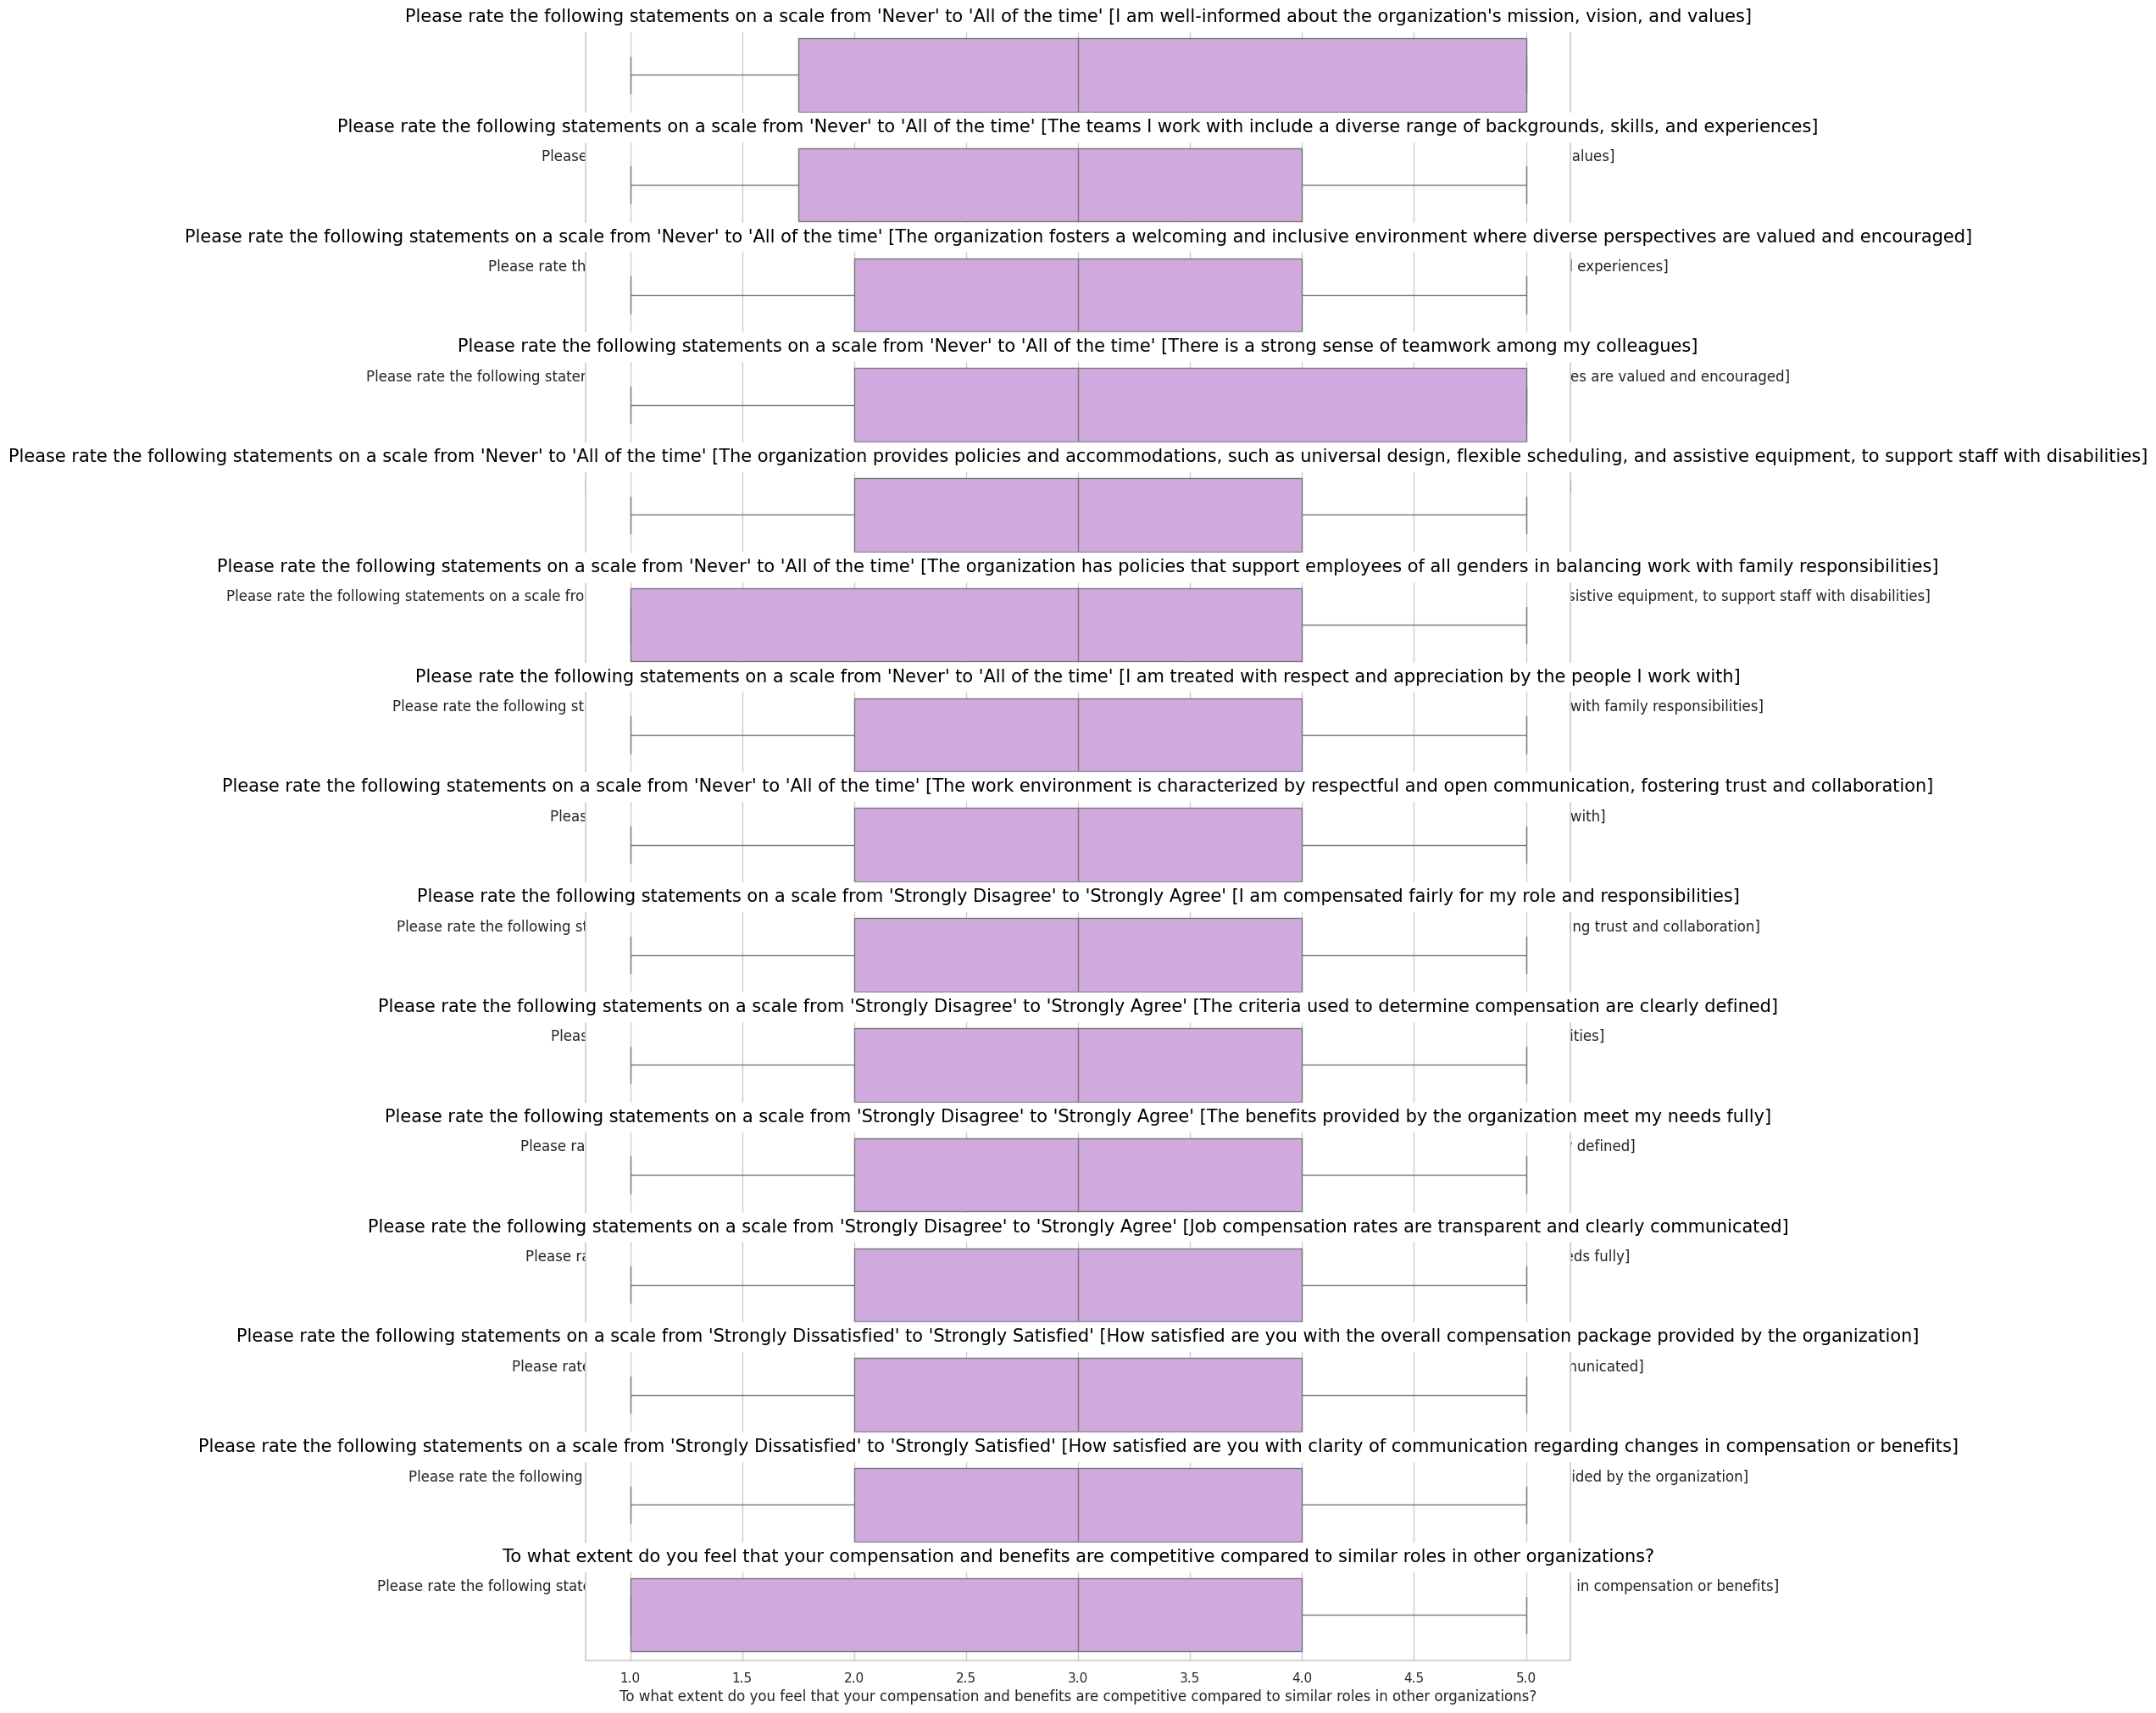

In [27]:
#Creating plots
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(15, 1, idx + 1)
    sns.boxplot(x = i, data = df_numbers,palette=["#D4A1E7","#6faea4"])
    plt.title(i,backgroundcolor='white',color='black',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()